In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
WomanParliaments = pd.read_csv('/content/1697825162018-WomanParliaments.csv',encoding='UTF-8-sig',sep=',')
WomanParliaments.head()

,Country Name,Country Code,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,NaN,27.868852,27.016129
2,Angola,AGO,9.545455,15.454545,15.454545,15.454545,15.454545,15.454545,15.454545,15.000000,...,38.181818,34.090909,34.090909,36.818182,36.818182,36.818182,30.454545,30.454545,30.000000,30.000000
3,Albania,ALB,NaN,NaN,5.161290,5.161290,5.714286,5.714286,5.714286,6.428571,...,15.714286,15.714286,17.857143,20.000000,20.714286,22.857143,27.857143,27.857143,29.508197,29.508197
4,Andorra,AND,7.142857,7.142857,7.142857,7.142857,14.285714,14.285714,14.285714,14.285714,...,50.000000,50.000000,50.000000,50.000000,39.285714,32.142857,32.142857,32.142857,46.428571,46.428571


In [206]:
WomanParliamentsMexico = WomanParliaments[WomanParliaments['Country Name']=='Mexico']
WomanParliamentsMexico.drop(columns=['Country Code'],inplace=True)
WomanParliamentsMexico.set_index('Country Name',inplace=True)
WomanParliamentsMexico = WomanParliamentsMexico.T
WomanParliamentsMexico.index.name = 'Year'
WomanParliamentsMexico.columns = ['Mexico']
WomanParliamentsMexico.head()

<ipython-input-206-eb0daba9d143>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WomanParliamentsMexico.drop(columns=['Country Code'],inplace=True)


,Mexico
Year,
1997,14.2
1998,17.4
1999,18.2
2000,16.0
2001,16.0


In [207]:
WomanParliamentsWorld = WomanParliaments
WomanParliamentsWorld.drop(columns=['Country Code'],inplace=True)
WomanParliamentsWorld = pd.melt(WomanParliamentsWorld,id_vars=['Country Name'],var_name='Year',value_name='WomanParliaments')
WomanParliamentsWorld.drop(columns=['Country Name'],inplace=True)
WomanParliamentsWorld = WomanParliamentsWorld.groupby(['Year']).mean()
WomanParliamentsWorld.columns = ['World']
WomanParliamentsWorld.head()

,World
Year,
1997,10.243278
1998,10.926304
1999,11.394605
2000,11.822155
2001,12.189253


In [208]:
WomanParliamentsMexicoxWorld = pd.merge(left=WomanParliamentsMexico,right=WomanParliamentsWorld,left_index=True,right_index=True)
WomanParliamentsMexicoxWorld = WomanParliamentsMexicoxWorld.loc['2000':'2020']
WomanParliamentsMexicoxWorld.head()

,Mexico,World
Year,,
2000,16.0,11.822155
2001,16.0,12.189253
2002,16.0,13.549565
2003,22.6,13.827423
2004,22.6,14.410010


In [209]:
years = ['2000','2020']
WomanParliamentsMexicoxWorldT = WomanParliamentsMexicoxWorld.loc['2000':'2020':5].T
WomanParliamentsMexicoxWorldT.head()

Year,2000,2005,2010,2015,2020
Mexico,16.000000,24.200000,26.200000,42.369478,48.20000
World,11.822155,15.279622,17.508532,20.761977,23.90838


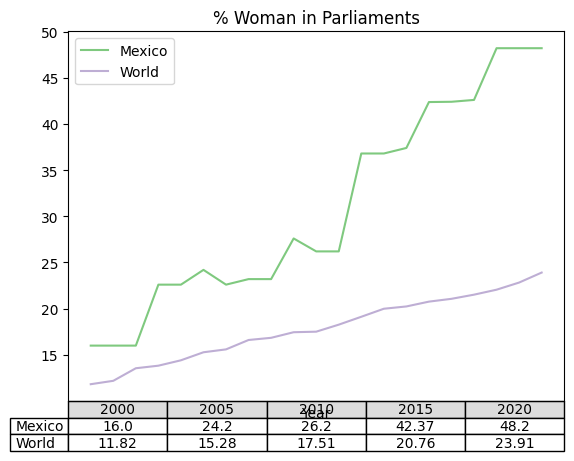

In [210]:
sns.set_palette('Accent')
WomanParliamentsMexicoxWorld.plot(kind='line',title='% Woman in Parliaments',xticks=[])
plt.table(cellText=WomanParliamentsMexicoxWorldT.values.round(2),colLabels=WomanParliamentsMexicoxWorldT.columns,rowLabels=WomanParliamentsMexicoxWorldT.index,cellLoc='center',colColours=['gainsboro']*5)



In [211]:
metadata = pd.read_csv('/content/1698423984078-Metadata.csv',encoding='UTF-8-sig',sep=',')
metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [214]:
WomanParliaments1 = pd.read_csv('/content/1697825162018-WomanParliaments.csv',encoding='UTF-8-sig',sep=',')
WomanParliaments1.head()

,Country Name,Country Code,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,NaN,27.868852,27.016129
2,Angola,AGO,9.545455,15.454545,15.454545,15.454545,15.454545,15.454545,15.454545,15.000000,...,38.181818,34.090909,34.090909,36.818182,36.818182,36.818182,30.454545,30.454545,30.000000,30.000000
3,Albania,ALB,NaN,NaN,5.161290,5.161290,5.714286,5.714286,5.714286,6.428571,...,15.714286,15.714286,17.857143,20.000000,20.714286,22.857143,27.857143,27.857143,29.508197,29.508197
4,Andorra,AND,7.142857,7.142857,7.142857,7.142857,14.285714,14.285714,14.285714,14.285714,...,50.000000,50.000000,50.000000,50.000000,39.285714,32.142857,32.142857,32.142857,46.428571,46.428571


In [220]:
columns = ['Region','2020']
metadata2020 = pd.merge(left=metadata,right=WomanParliaments1,left_on='Country Code',right_on='Country Code')
metadata2020 = metadata2020[columns]
metadata2020 = metadata2020.groupby(['Region']).mean()
metadata2020.columns = ['2020']
metadata2020.head()

,2020
Region,
East Asia & Pacific,16.531978
Europe & Central Asia,29.814495
Latin America & Caribbean,28.145326
Middle East & North Africa,17.234940
North America,28.229436


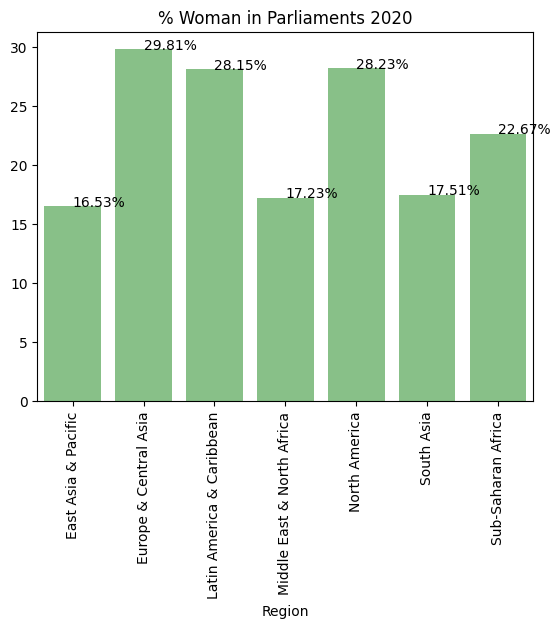

In [230]:


sns.barplot(x=metadata2020.index,y='2020',data=metadata2020)
plt.title('% Woman in Parliaments 2020')
plt.ylabel('')
plt.xticks(rotation=90)


for i in range(metadata2020.shape[0]):
  plt.text(i,metadata2020.iloc[i,0],str(f'{metadata2020.iloc[i,0]:.2f}')+'%')




In [251]:
columns = ['Country Code','2020']
WomanParliaments2 = WomanParliaments1[columns]
#WomanParliaments2.set_index('Country Code',inplace=True)
WomanParliaments2 = WomanParliaments2.dropna()
WomanParliaments2

,Country Code,2020
1,AFG,27.016129
2,AGO,30.000000
3,ALB,29.508197
4,AND,46.428571
5,ARB,19.546959
...,...,...
258,WSM,10.000000
260,YEM,0.332226
261,ZAF,46.750000
262,ZMB,16.766467


<ipython-input-252-c1c143d6215e>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(WomanParliaments2['2020'],labels=['2020'])


Text(1.1, 53.2, 'MEX')

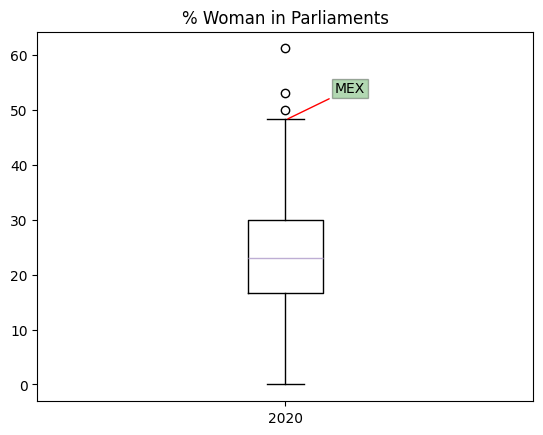

In [252]:
plt.boxplot(WomanParliaments2['2020'],labels=['2020'])
plt.title('% Woman in Parliaments')
mex_value = WomanParliaments2.loc[WomanParliaments2['Country Code']=='MEX','2020'].to_list()[0]
plt.annotate('MEX',xy=(1,mex_value),xytext=(1.1,mex_value+5),arrowprops=dict(arrowstyle='-',color='red'),bbox=dict(facecolor='green',alpha=0.3,pad=2))